In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values
print("labels", labels)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)


pca=PCA(n_components =12)
#print("pca",pca)
pca.fit(Xnorm)

X_pca = pca.transform(Xnorm)





labels ['ajac' 'ange' 'ango' 'besa' 'biar' 'bord' 'bres' 'cler' 'dijo' 'embr'
 'gren' 'lill' 'limo' 'lyon' 'mars' 'mont' 'nanc' 'nant' 'nice' 'nime'
 'orle' 'pari' 'perp' 'reim' 'renn' 'roue' 'stqu' 'stra' 'toul' 'tlse'
 'tour' 'vich']


[[ 2.71818182  3.55909091  7.08636364  9.98181818 13.54090909 16.75909091
  18.63181818 18.28636364 15.68181818 10.99090909  6.63181818  3.55      ]
 [ 6.6         7.5        10.41       12.84       16.13       19.87
  22.22       22.02       19.59       15.08       10.6         7.5       ]] [2.71818182 6.6       ]


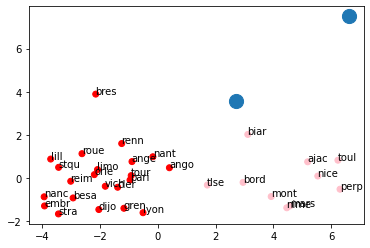

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.colors as mcolors
from sklearn.neighbors.nearest_centroid import NearestCentroid

clustering = AgglomerativeClustering().fit(X_pca)
y_predict = clustering.fit_predict(X_pca)
n_clusters = 3
colors = ['red','yellow','blue','pink']


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_predict, cmap= mcolors.ListedColormap(colors))


clf = NearestCentroid()
clf.fit(X, y_predict)
centers = clf.centroids_
print(centers, centers[:, 0])

plt.scatter(centers[:, 0], centers[:, 1], cmap= mcolors.ListedColormap(colors),  s=200 );


for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()





In [4]:
#clustering = AgglomerativeClustering().fit(X)
#ward.fit(X)